In [1]:
#tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
image_size = 256
BATCH_SIZE = 32

In [3]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(
    'potato',
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [4]:
classname = dataset.class_names

In [5]:
len(dataset)*32

2176

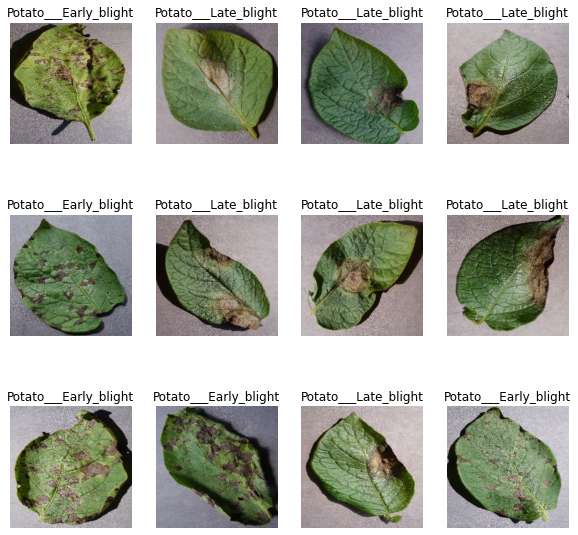

In [6]:
for image_batch, labels_batch in dataset.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.title(classname[labels_batch[i]])
    plt.imshow(image_batch[i].numpy().astype("uint8"))

    plt.axis('off')

In [7]:
def gives_train_test_data(dataset, train_size=0.8, var_size=0.1, test_size=0.1, suffle=True, suffle_size=10000):
    if suffle:
        dataset = dataset.shuffle(suffle_size, seed=12)
    total_size = len(dataset)
    train_len = int(total_size*train_size)
    var_len = int(total_size*var_size)
    test_len = int(total_size*test_size)
    train_data = dataset.take(train_len)
    var_data = dataset.skip(train_len).take(var_len)
    test_data = dataset.skip(train_len+var_len).take(test_len)
    return train_data, var_data, test_data

In [8]:
train_data, var_data, test_data = gives_train_test_data(dataset)

In [9]:
len(train_data)*32, len(var_data)*32, len(test_data)*32

(1728, 192, 192)

In [10]:
train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
var_data = var_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [13]:
input_shape =(BATCH_SIZE, image_size, image_size, 3)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers. Flatten(),
    layers.Dense (64, activation='relu'),
    layers.Dense (n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    batch_size=BATCH_SIZE,
    validation_data=var_data,
    
    verbose=1,
)


In [ ]:
model.evaluate(test_data)